In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
#Load the dataset in Python environment
data = pd.read_csv('/content/train_loan.csv')

In [16]:
# Display the  rows of the training dataset
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [17]:
#2. Perform different preprocessing steps
#a.. Missing value handling
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [18]:
# Handle missing values
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].mode()[0])
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0])
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mode()[0])

data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


{'whiskers': [<matplotlib.lines.Line2D at 0x7dfe2085f970>,
 'caps': [<matplotlib.lines.Line2D at 0x7dfe2085ec20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7dfe2085ded0>],
 'medians': [<matplotlib.lines.Line2D at 0x7dfe2085fb50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7dfe2085c820>],
 'means': []}

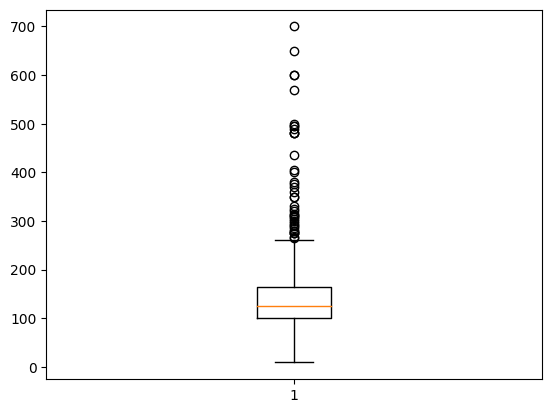

In [22]:
plt.boxplot(data['LoanAmount'])

In [30]:
Q1 = np.percentile(data['LoanAmount'],25,method='midpoint')
Q3 = np.percentile(data['LoanAmount'],75,method='midpoint')
IQR = Q3 - Q1
l1 = Q1 - 1.5 * IQR
l3 = Q3 + 1.5 * IQR
outliers = []
for val in data['LoanAmount']:
  if val>l3 or val<l1:
    outliers.append(val)
outliers= data[((data['LoanAmount'] < l1) | (data['LoanAmount'] > l3))]
print(outliers)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
5    LP001011    Male     Yes          2      Graduate           Yes   
9    LP001020    Male     Yes          1      Graduate            No   
21   LP001046    Male     Yes          1      Graduate            No   
34   LP001100    Male      No         3+      Graduate            No   
54   LP001186  Female     Yes          1      Graduate           Yes   
67   LP001233    Male     Yes          1      Graduate            No   
83   LP001273    Male     Yes          0      Graduate            No   
126  LP001448    Male     Yes         3+      Graduate            No   
130  LP001469    Male      No          0      Graduate           Yes   
135  LP001488    Male     Yes         3+      Graduate            No   
155  LP001536    Male     Yes         3+      Graduate            No   
161  LP001562    Male     Yes          0      Graduate            No   
171  LP001585    Male     Yes         3+      Graduate          

In [31]:
#encoding
categorical_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']

In [32]:
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)
data_encoded

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,0,5849,0.0,120.0,360.0,1.0,Y,1,0,0,0,0,1
1,LP001003,1,4583,1508.0,128.0,360.0,1.0,N,1,1,0,0,0,0
2,LP001005,0,3000,0.0,66.0,360.0,1.0,Y,1,1,0,1,0,1
3,LP001006,0,2583,2358.0,120.0,360.0,1.0,Y,1,1,1,0,0,1
4,LP001008,0,6000,0.0,141.0,360.0,1.0,Y,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,2900,0.0,71.0,360.0,1.0,Y,0,0,0,0,0,0
610,LP002979,3+,4106,0.0,40.0,180.0,1.0,Y,1,1,0,0,0,0
611,LP002983,1,8072,240.0,253.0,360.0,1.0,Y,1,1,0,0,0,1
612,LP002984,2,7583,0.0,187.0,360.0,1.0,Y,1,1,0,0,0,1


In [33]:
#scaling
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()

In [37]:
data[numerical_cols] = min_max.fit_transform(data[numerical_cols].fillna(data[numerical_cols].mean()))
print(data)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0           0.070489           0.000000    0.160637          0